In [1]:
import tensorflow as tf
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import data
from scipy.misc import imresize
from scipy.ndimage.filters import gaussian_filter
import IPython.display as ipyd
import tensorflow as tf
from libs import utils, datasets, dataset_utils, vae, dft, vgg16, nb_utils
import cv2

In [ ]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
style_image = plt.imread("687px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg")
monalisa = cv2.resize(style_image,(IMAGE_HEIGHT, IMAGE_WIDTH))

content_image = plt.imread("../datasets/coco/test2014/COCO_test2014_000000291436.jpg")
awesomeguy = cv2.resize(content_image,(IMAGE_HEIGHT, IMAGE_WIDTH))

print(awesomeguy.shape)
awesomeguy = awesomeguy.astype(np.float32)
monalisa = monalisa.astype(np.float32)

awesomeguy /=255
monalisa /=255
#awesomeguy -=1
#monalisa -=1 

plt.imshow(awesomeguy)
plt.show()
plt.imshow(monalisa)
plt.show()

In [ ]:
net = vgg16.get_vgg_model()

x = tf.placeholder(name="inputimage",dtype=tf.float32,shape=[None,256,256,3])
stylex = tf.placeholder(name="styleimage",dtype=tf.float32,shape=[None,256,256,3])

# Now load the graph_def, which defines operations and their values into `g`
conv2, conv3 = tf.import_graph_def(net['graph_def'], name='net', input_map={'images:0': x}, return_elements=['conv2_2/conv2_2:0','conv3_1/conv3_1:0'])
conv2_style, conv3_style = tf.import_graph_def(net['graph_def'], name='net', input_map={'images:0': stylex}, return_elements=['conv2_2/conv2_2:0','conv3_1/conv3_1:0'])
print(conv2)
print(conv3)



In [ ]:

content_features = sess.run(conv3, feed_dict={x: np.array([awesomeguy])})
print(content_features.shape)

# Hoe werkt de gram matrix?

In [ ]:

def gram_matrix(featuremap):
    sfm = featuremap.shape #shape feature map
    
    vectorised_featuremap = tf.reshape(featuremap,[-1,int(sfm[1])*int(sfm[2]),int(sfm[3])])
    vec_transposed = tf.transpose(vectorised_featuremap,perm=[0,2,1])
    grammatrix = tf.matmul(vec_transposed,vectorised_featuremap)
    return grammatrix

gram_content = gram_matrix(conv3)
gram_style = gram_matrix(conv3_style)
print(gram_content)
print(gram_style)

style_loss = tf.reduce_sum(tf.square(gram_content - gram_style))

gradient = tf.gradients(style_loss,x)
grad = gradient[0]

In [ ]:
tf.transpose?

In [ ]:
print(grad)

In [ ]:

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())


# Precomputation step!
Result should be: 
    - content_features
    - style_features

In [4]:
tf.reset_default_graph()
#g = tf.Graph()
net = vgg16.get_vgg_model()
tf.import_graph_def(net['graph_def'], name='vgg')
names = [op.name for op in tf.get_default_graph().get_operations()]
print("Len names: %d " % len(names))

Len names: 129 


In [5]:

from skimage.data import coffee
og = coffee()
plt.imshow(og)
img = vgg16.preprocess(og)
plt.imshow(vgg16.deprocess(img))
img_4d = img[np.newaxis]

content_layer = 'vgg/conv4_2/conv4_2:0'

names = [op.name for op in tf.get_default_graph().get_operations()]
x = tf.get_default_graph().get_tensor_by_name(names[0] + ':0')
print("Awesome stuff")


with tf.Session() as sess:
    content_layer = 'vgg/conv4_2/conv4_2:0'
    
    content_features = tf.get_default_graph().get_tensor_by_name(content_layer).eval(
            session=sess,
            feed_dict={x: img_4d,
                'vgg/dropout_1/random_uniform:0': [[1.0] * 4096],
                'vgg/dropout/random_uniform:0': [[1.0] * 4096]
            })
print("Shape content features: %s " % str(content_features.shape))


[u'vgg/images', u'vgg/mul/y', u'vgg/mul', u'vgg/split/split_dim', u'vgg/split', u'vgg/sub/y', u'vgg/sub', u'vgg/sub_1/y', u'vgg/sub_1', u'vgg/sub_2/y', u'vgg/sub_2', u'vgg/concat/concat_dim', u'vgg/concat', u'vgg/conv1_1/filter', u'vgg/conv1_1/Conv2D', u'vgg/conv1_1/biases', u'vgg/conv1_1/BiasAdd', u'vgg/conv1_1/conv1_1', u'vgg/conv1_2/filter', u'vgg/conv1_2/Conv2D', u'vgg/conv1_2/biases', u'vgg/conv1_2/BiasAdd', u'vgg/conv1_2/conv1_2', u'vgg/pool1', u'vgg/conv2_1/filter', u'vgg/conv2_1/Conv2D', u'vgg/conv2_1/biases', u'vgg/conv2_1/BiasAdd', u'vgg/conv2_1/conv2_1', u'vgg/conv2_2/filter', u'vgg/conv2_2/Conv2D', u'vgg/conv2_2/biases', u'vgg/conv2_2/BiasAdd', u'vgg/conv2_2/conv2_2', u'vgg/pool2', u'vgg/conv3_1/filter', u'vgg/conv3_1/Conv2D', u'vgg/conv3_1/biases', u'vgg/conv3_1/BiasAdd', u'vgg/conv3_1/conv3_1', u'vgg/conv3_2/filter', u'vgg/conv3_2/Conv2D', u'vgg/conv3_2/biases', u'vgg/conv3_2/BiasAdd', u'vgg/conv3_2/conv3_2', u'vgg/conv3_3/filter', u'vgg/conv3_3/Conv2D', u'vgg/conv3_3/bia

In [13]:
style_layers = ['vgg/conv1_1/conv1_1:0',
                'vgg/conv2_1/conv2_1:0',
                'vgg/conv3_1/conv3_1:0',
                'vgg/conv4_1/conv4_1:0',
                'vgg/conv5_1/conv5_1:0']
style_activations = []
style_image = plt.imread("687px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg")
style_img = vgg16.preprocess(style_image)
style_img_4d = style_img[np.newaxis]

patches_activations = []
with tf.Session() as sess:
    for style_i in style_layers:
        
        patches = tf.extract_image_patches(tf.get_default_graph().get_tensor_by_name(style_i), [1,3,3,1], [1,1,1,1], [1,1,1,1],'VALID')
        style_activation_i, evaluatedpatches = sess.run([tf.get_default_graph().get_tensor_by_name(style_i), patches], feed_dict={
                x: style_img_4d,
                'vgg/dropout_1/random_uniform:0': [[1.0] * 4096],
                'vgg/dropout/random_uniform:0': [[1.0] * 4096]})
        style_activations.append(style_activation_i)
        patches_activations.append(evaluatedpatches)
        print("shape patches: %s " % str(evaluatedpatches.shape))
print("Len style activations: %s " % len(style_activations))

style_features = []
for style_activation_i in style_activations:
    print(style_activation_i.shape)
    s_i = np.reshape(style_activation_i, [-1, style_activation_i.shape[-1]])
    gram_matrix = np.matmul(s_i.T, s_i) / s_i.size
    style_features.append(gram_matrix.astype(np.float32))


shape patches: (1, 222, 222, 576) 
shape patches: (1, 110, 110, 1152) 
shape patches: (1, 54, 54, 2304) 
shape patches: (1, 26, 26, 4608) 
shape patches: (1, 12, 12, 4608) 
Len style activations: 5 
(1, 224, 224, 64)
(1, 112, 112, 128)
(1, 56, 56, 256)
(1, 28, 28, 512)
(1, 14, 14, 512)


In [21]:


#####################################################

tf.reset_default_graph()
g = tf.get_default_graph()



print(img_4d.shape)
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    net_input = tf.Variable(img_4d)
    tf.import_graph_def(
        net['graph_def'],
        name='vgg',
        input_map={'images:0': net_input})

print("Content loss time")

with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    content_loss = tf.nn.l2_loss((g.get_tensor_by_name(content_layer) -
                             content_features) /
                             content_features.size)


print("Style loss time")
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    style_loss = np.float32(0.0)
    for style_layer_i, style_gram_i in zip(style_layers, style_features):
        layer_i = g.get_tensor_by_name(style_layer_i)
        layer_shape = layer_i.get_shape().as_list()
        layer_size = layer_shape[1] * layer_shape[2] * layer_shape[3]
        layer_flat = tf.reshape(layer_i, [-1, layer_shape[3]])
        gram_matrix = tf.matmul(tf.transpose(layer_flat), layer_flat) / layer_size
        style_loss = tf.add(style_loss, tf.nn.l2_loss((gram_matrix - style_gram_i) / np.float32(style_gram_i.size)))

def total_variation_loss(x):
    h, w = x.get_shape().as_list()[1], x.get_shape().as_list()[1]
    dx = tf.square(x[:, :h-1, :w-1, :] - x[:, :h-1, 1:, :])
    dy = tf.square(x[:, :h-1, :w-1, :] - x[:, 1:, :w-1, :])
    return tf.reduce_sum(tf.pow(dx + dy, 1.25))

with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    tv_loss = total_variation_loss(net_input)


(1, 224, 224, 3)
Content loss time
Style loss time


In [25]:
markov_style_loss = np.float32(0.0)
for index, style_layer_name in enumerate(style_layers):
    activation_generated_image = tf.get_default_graph().get_tensor_by_name(style_layer_name)
    print(activation_generated_image)
# print("Activation generated image: " + str(activation_generated_image))
    #stylepatches = get_patches(style_awesome_input,style_layer_names[index])
    actual_patches = patches_activations[index][0,:,:,:] # Only optimise one image

    noww = int(actual_patches.shape[0])
    nowh = int(actual_patches.shape[1])
    nowfilters = int(actual_patches.shape[2])
    newshape = [int(noww*nowh), int(nowfilters)]

    N_filters_with_N_values = tf.reshape(actual_patches,newshape,name="awesome_stuff")
    N_values_with_N_filters = tf.transpose(N_filters_with_N_values)
    print("till here!")
    print(N_values_with_N_filters)
    print(actual_patches.shape)
    kernel_for_convolution = tf.reshape(N_values_with_N_filters,[3,3,-1,noww*nowh])
    result_compare = tf.nn.conv2d(activation_generated_image, kernel_for_convolution, strides=[1, 1, 1, 1], padding='SAME')
    lowest_losses = tf.reduce_min(result_compare, axis=3)
    markov_random_field_loss = tf.reduce_sum(tf.square(lowest_losses))
    tf.add(markov_style_loss, markov_random_field_loss)#tf.nn.l2_loss(lowest_losses))
# print(markov_random_field_loss)
# losses.append(markov_random_field_loss)


Tensor("vgg/conv1_1/conv1_1:0", shape=(1, 224, 224, 64), dtype=float32, device=/device:CPU:0)
till here!
Tensor("transpose_10:0", shape=(576, 49284), dtype=float32)
(222, 222, 576)
Tensor("vgg/conv2_1/conv2_1:0", shape=(1, 112, 112, 128), dtype=float32, device=/device:CPU:0)
till here!
Tensor("transpose_11:0", shape=(1152, 12100), dtype=float32)
(110, 110, 1152)
Tensor("vgg/conv3_1/conv3_1:0", shape=(1, 56, 56, 256), dtype=float32, device=/device:CPU:0)
till here!
Tensor("transpose_12:0", shape=(2304, 2916), dtype=float32)
(54, 54, 2304)
Tensor("vgg/conv4_1/conv4_1:0", shape=(1, 28, 28, 512), dtype=float32, device=/device:CPU:0)
till here!
Tensor("transpose_13:0", shape=(4608, 676), dtype=float32)
(26, 26, 4608)
Tensor("vgg/conv5_1/conv5_1:0", shape=(1, 14, 14, 512), dtype=float32, device=/device:CPU:0)
till here!
Tensor("transpose_14:0", shape=(4608, 144), dtype=float32)
(12, 12, 4608)


In [26]:
loss = 0.1 * content_loss + 5.0 * markov_style_loss + 0.01 * tv_loss
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)


0: 7.252161, (-0.006779 - 1.007946)


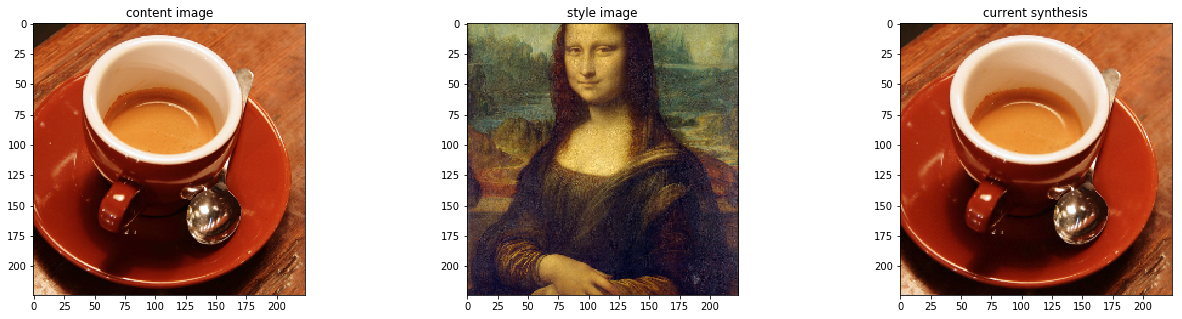

1: 6.321458, (-0.011314 - 1.001806)
2: 5.526135, (-0.006861 - 0.997428)
3: 4.877226, (-0.005666 - 0.993718)
4: 4.327844, (-0.003749 - 0.991788)
5: 3.845247, (-0.006430 - 0.986779)


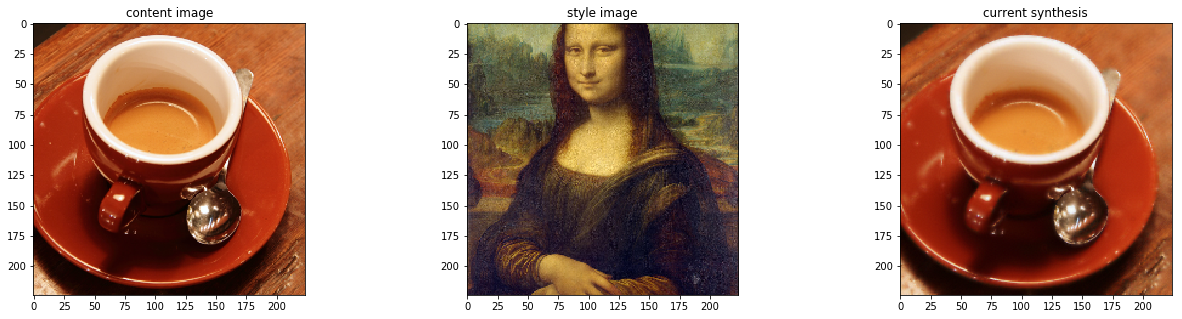

6: 3.421730, (-0.007212 - 0.981163)
7: 3.052331, (-0.005209 - 0.978976)
8: 2.729168, (-0.003646 - 0.976161)
9: 2.444248, (-0.002450 - 0.974236)
10: 2.190841, (-0.003311 - 0.972102)


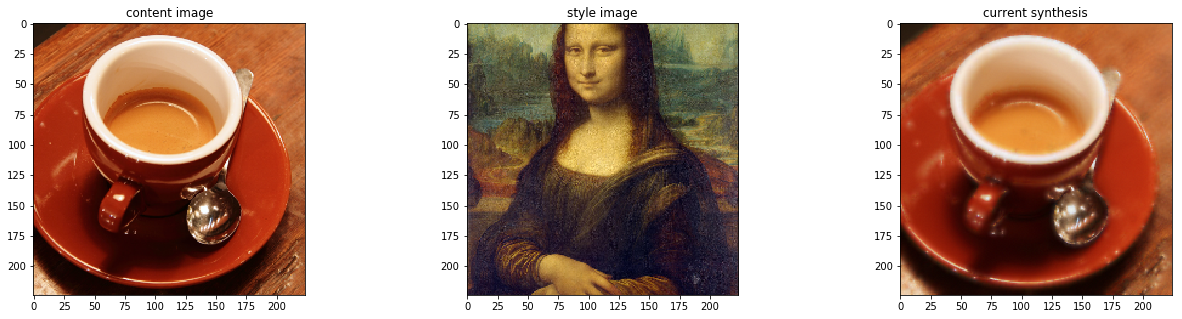

11: 1.965492, (-0.003900 - 0.972941)
12: 1.765980, (-0.002213 - 0.972641)
13: 1.589507, (-0.001416 - 0.970136)
14: 1.433028, (-0.002660 - 0.965815)
15: 1.293700, (-0.002417 - 0.963211)


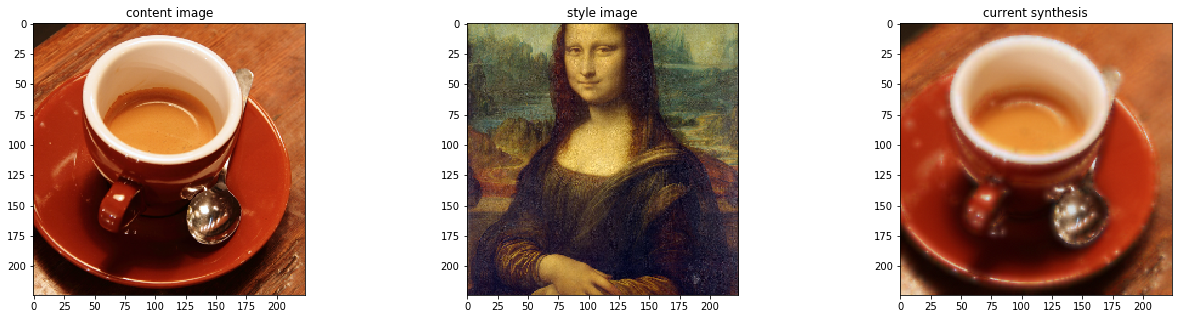

16: 1.169312, (-0.001824 - 0.959306)
17: 1.058387, (-0.000342 - 0.955360)
18: 0.959695, (-0.000677 - 0.951727)
19: 0.871915, (-0.000784 - 0.950539)
20: 0.793694, (-0.002317 - 0.949879)


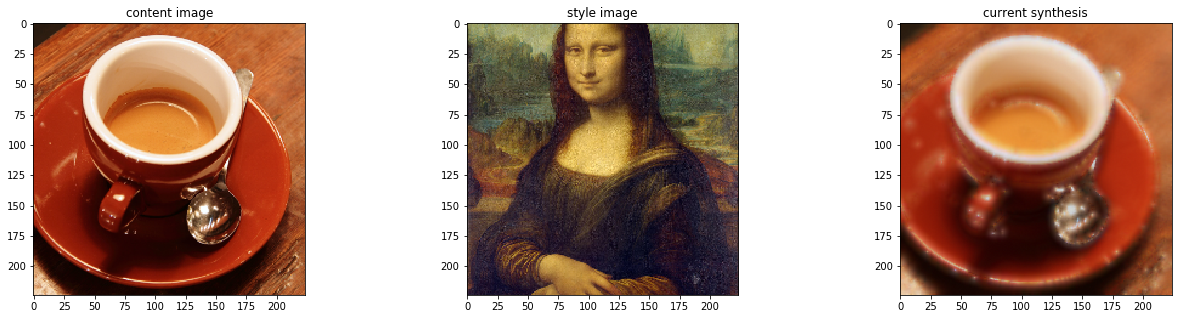

21: 0.723818, (-0.003067 - 0.948870)
22: 0.661307, (-0.002928 - 0.947310)
23: 0.605376, (-0.002264 - 0.947573)
24: 0.555353, (-0.001631 - 0.947159)
25: 0.510592, (-0.000246 - 0.946236)


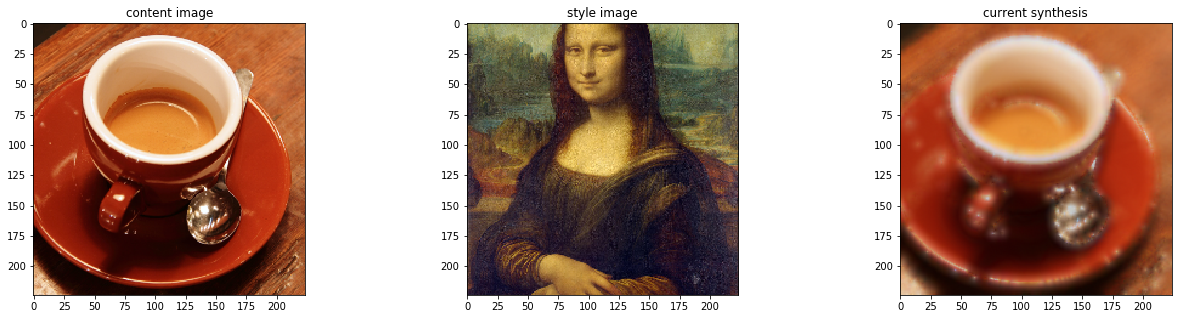

26: 0.470483, (-0.000732 - 0.945014)
27: 0.434487, (-0.000800 - 0.944050)
28: 0.402141, (-0.000528 - 0.943516)
29: 0.373036, (-0.000176 - 0.943307)
30: 0.346819, (-0.001493 - 0.952992)


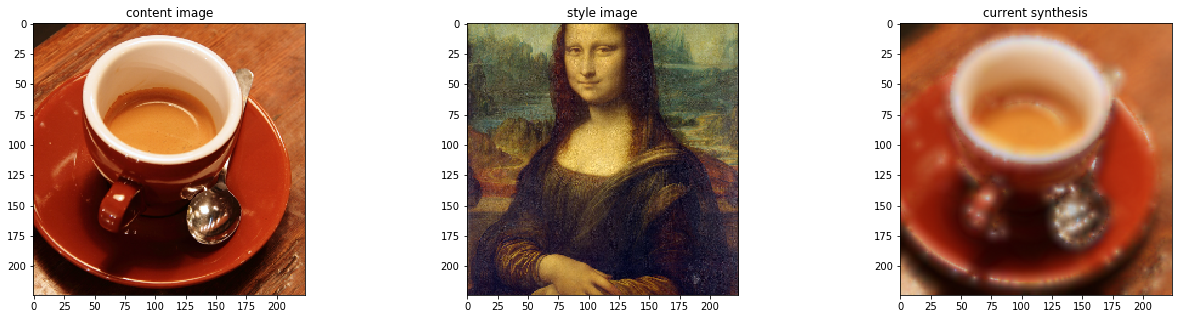

31: 0.323176, (-0.002663 - 0.962897)
32: 0.301825, (-0.003620 - 0.973051)
33: 0.282507, (-0.005117 - 0.983357)
34: 0.264988, (-0.006278 - 0.993766)
35: 0.249064, (-0.006557 - 1.004346)


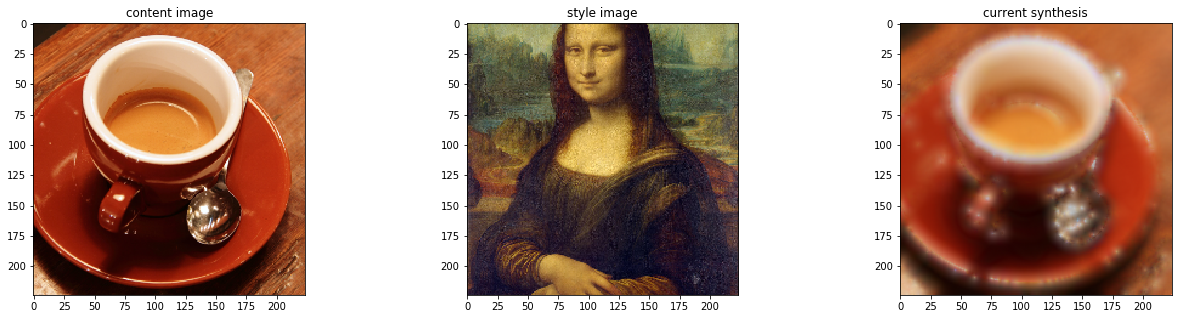

36: 0.234565, (-0.006016 - 1.014987)
37: 0.221343, (-0.005072 - 1.025686)
38: 0.209264, (-0.005108 - 1.036427)
39: 0.198202, (-0.006262 - 1.047163)
40: 0.188051, (-0.007280 - 1.057884)


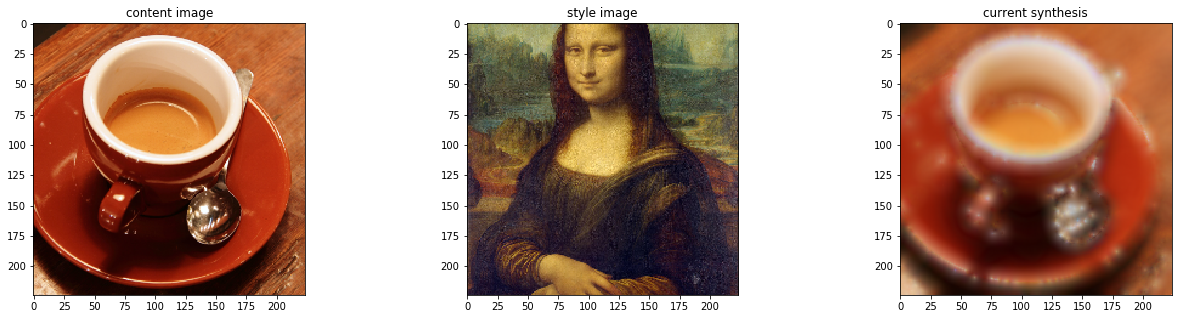

41: 0.178718, (-0.007644 - 1.068456)
42: 0.170119, (-0.007606 - 1.078860)
43: 0.162183, (-0.008020 - 1.089207)
44: 0.154842, (-0.008065 - 1.099573)
45: 0.148041, (-0.007776 - 1.109922)


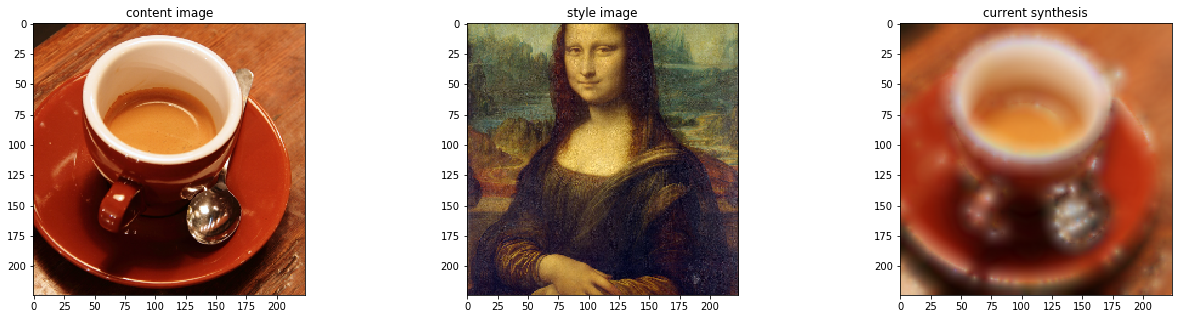

46: 0.141727, (-0.007345 - 1.120310)
47: 0.135854, (-0.006951 - 1.130836)
48: 0.130379, (-0.006923 - 1.141469)
49: 0.125265, (-0.006921 - 1.152145)
50: 0.120485, (-0.006827 - 1.162925)


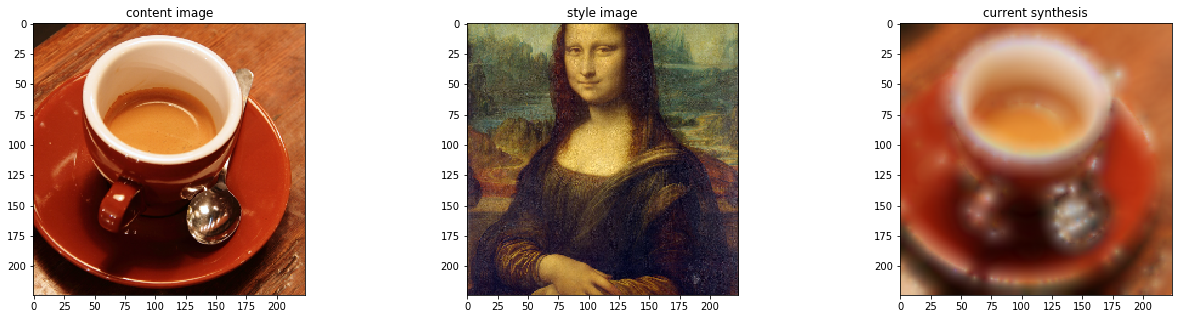

51: 0.116011, (-0.006648 - 1.173812)
52: 0.111817, (-0.006908 - 1.184806)
53: 0.107883, (-0.007060 - 1.195913)
54: 0.104189, (-0.006912 - 1.207039)
55: 0.100715, (-0.006595 - 1.218178)


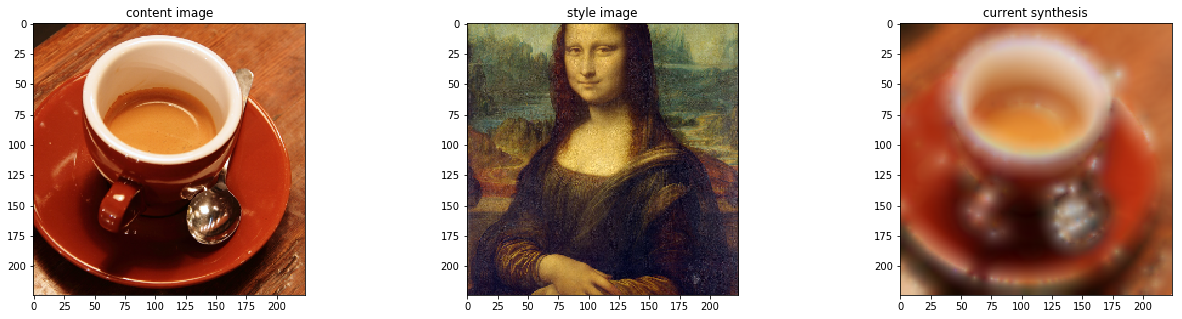

56: 0.097444, (-0.006405 - 1.229338)
57: 0.094363, (-0.006522 - 1.240649)
58: 0.091456, (-0.006587 - 1.252353)
59: 0.088711, (-0.006622 - 1.264370)
60: 0.086116, (-0.006560 - 1.276702)


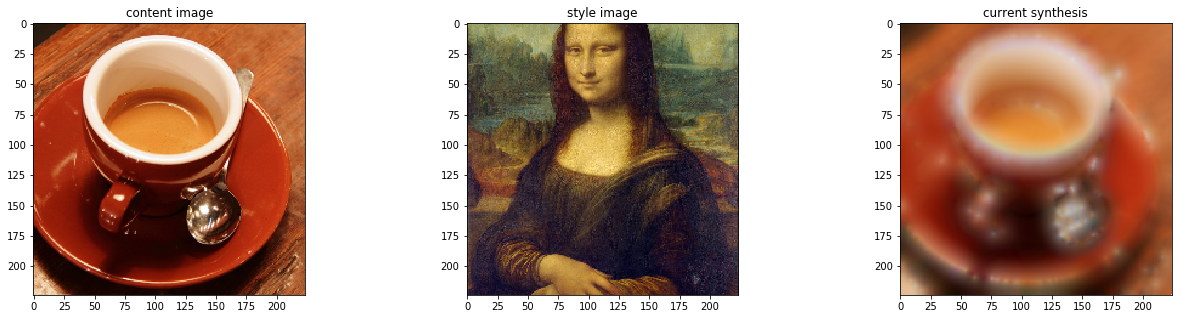

61: 0.083659, (-0.006373 - 1.289371)
62: 0.081330, (-0.005996 - 1.302446)
63: 0.079120, (-0.005477 - 1.315865)
64: 0.077021, (-0.004993 - 1.329582)
65: 0.075025, (-0.004596 - 1.343479)


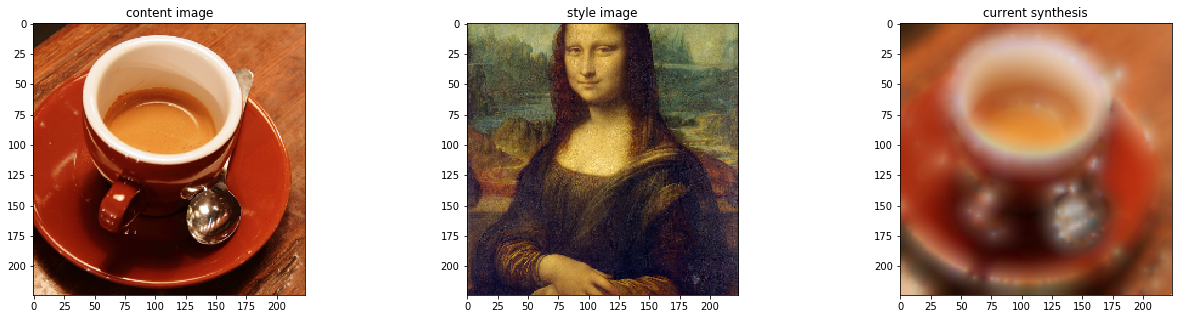

66: 0.073124, (-0.004316 - 1.357515)
67: 0.071313, (-0.004125 - 1.371706)
68: 0.069585, (-0.003909 - 1.386051)
69: 0.067936, (-0.003818 - 1.400516)
70: 0.066359, (-0.003685 - 1.415089)


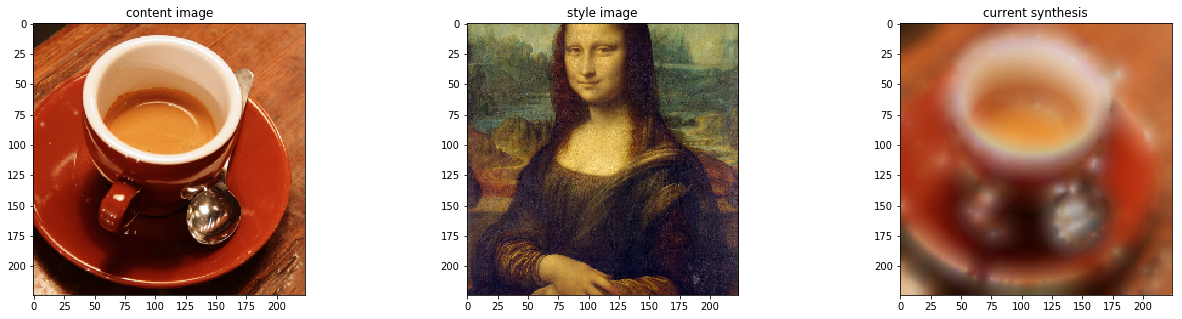

71: 0.064850, (-0.003488 - 1.429715)
72: 0.063405, (-0.003230 - 1.444435)
73: 0.062019, (-0.002886 - 1.459205)
74: 0.060689, (-0.002440 - 1.473975)
75: 0.059413, (-0.001912 - 1.488727)


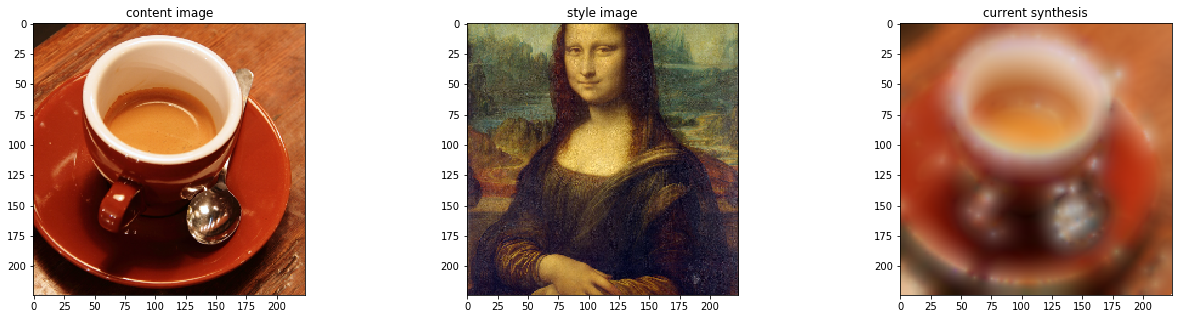

76: 0.058187, (-0.001341 - 1.503462)
77: 0.057008, (-0.000753 - 1.518115)
78: 0.055874, (-0.000137 - 1.532667)
79: 0.054781, (0.000532 - 1.547052)
80: 0.053728, (0.001263 - 1.561234)


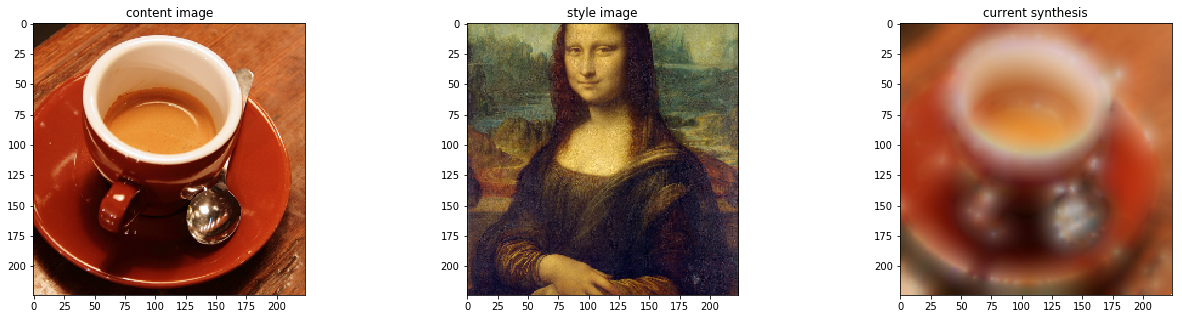

81: 0.052712, (0.001583 - 1.575161)
82: 0.051732, (0.001841 - 1.588825)
83: 0.050786, (0.002132 - 1.602214)
84: 0.049872, (0.002464 - 1.615227)
85: 0.048989, (0.002834 - 1.627837)


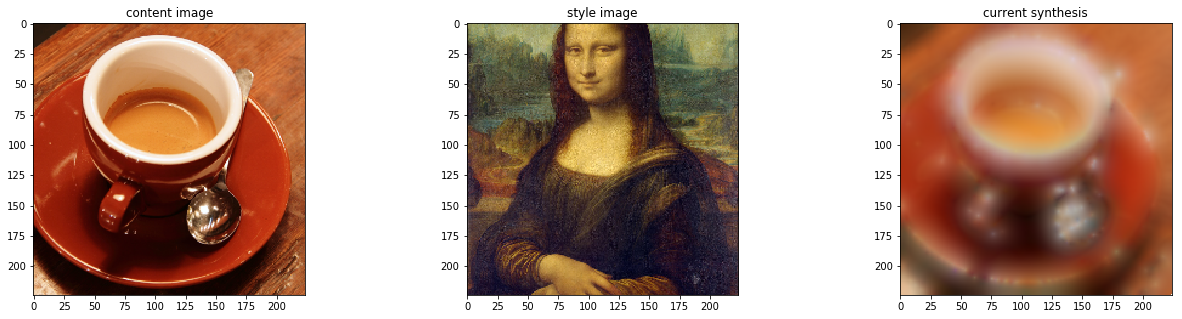

86: 0.048135, (0.002986 - 1.640051)
87: 0.047309, (0.003174 - 1.651880)
88: 0.046509, (0.003444 - 1.663375)
89: 0.045735, (0.003823 - 1.674490)
90: 0.044985, (0.004344 - 1.685198)


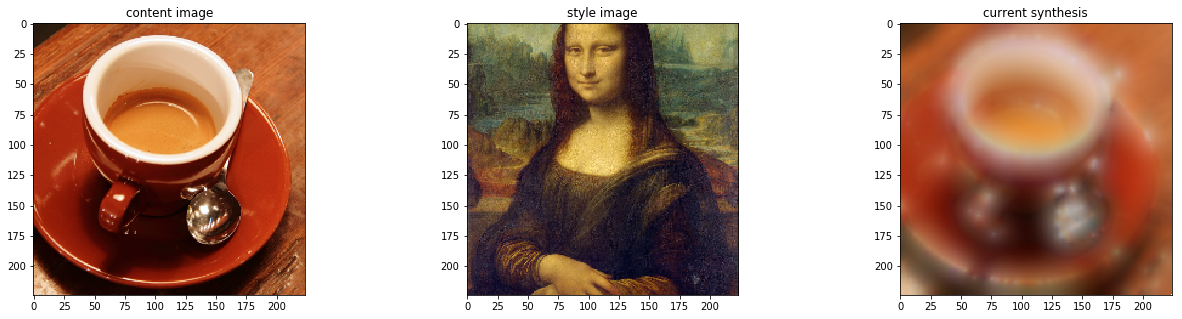

91: 0.044258, (0.005039 - 1.695535)
92: 0.043554, (0.005930 - 1.705568)
93: 0.042870, (0.006704 - 1.715249)
94: 0.042206, (0.007478 - 1.724607)
95: 0.041562, (0.008032 - 1.733663)


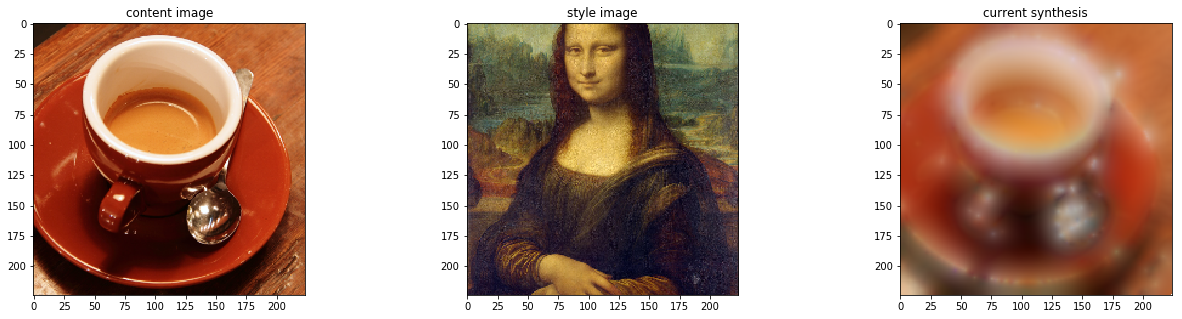

96: 0.040936, (0.008687 - 1.742390)
97: 0.040327, (0.009465 - 1.750773)
98: 0.039736, (0.010369 - 1.758889)
99: 0.039161, (0.011410 - 1.766755)


In [27]:
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    sess.run(tf.global_variables_initializer())
    # map input to noise
    n_iterations = 100
    og_img = net_input.eval()
    imgs = []
    for it_i in range(n_iterations):
        _, this_loss, synth = sess.run([optimizer, loss, net_input],
                feed_dict={
                    'vgg/dropout_1/random_uniform:0':
                        np.ones(g.get_tensor_by_name(
                        'vgg/dropout_1/random_uniform:0').get_shape().as_list()),
                    'vgg/dropout/random_uniform:0':
                        np.ones(g.get_tensor_by_name(
                        'vgg/dropout/random_uniform:0').get_shape().as_list())})
        print("%d: %f, (%f - %f)" %
            (it_i, this_loss, np.min(synth), np.max(synth)))
        if it_i % 5 == 0:
            imgs.append(np.clip(synth[0], 0, 1))
            fig, ax = plt.subplots(1, 3, figsize=(22, 5))
            ax[0].imshow(vgg16.deprocess(img))
            ax[0].set_title('content image')
            ax[1].imshow(vgg16.deprocess(style_img))
            ax[1].set_title('style image')
            ax[2].set_title('current synthesis')
            ax[2].imshow(vgg16.deprocess(synth[0]))
            plt.show()
            fig.canvas.draw()


In [ ]:

cimg = awesomeguy.copy()

for _ in range(100):
    plt.imshow(cimg)
    plt.show()
    to_apply, myloss = sess.run([grad, style_loss],feed_dict={x: np.array([cimg]), stylex: np.array([monalisa]) })
    print(myloss)
    #print(to_apply.shape)
    #print(to_apply)
    cimg += 0.0000000000000000000001*to_apply[0,:,:,:]
    print(np.max(cimg))
